In [121]:
from glob import glob

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [122]:
task = "greater-than"
ratio = 1.8

df = []
for path in glob(f"hyperparameter_results/{task}_results_*.csv"):
    df.append(pd.read_csv(path))
df = pd.concat(df)
df.columns = ["Ablation Scheme", "Include MLPs", "Threshold", "Accuracy", "Size", "Num. Heads", "Num. MLP"]
df["Size (%)"] = (df["Size"].max() - df["Size"]) / df["Size"].max() * 100
df

,Ablation Scheme,Include MLPs,Threshold,Accuracy,Size,Num. Heads,Num. MLP,Size (%)
0,mean,False,0.000010,1.000,82694400,132,12,2.776524
1,mean,False,0.000016,1.000,81710400,127,12,3.933409
2,mean,False,0.000026,1.000,80923200,123,12,4.858916
3,mean,False,0.000042,1.000,79348800,115,12,6.709932
4,mean,False,0.000067,1.000,76593600,101,12,9.949210
...,...,...,...,...,...,...,...,...
115,zero,True,1.487352,0.752,14571648,2,3,82.868172
116,zero,True,2.395026,0.764,4725504,0,1,94.444244
117,zero,True,3.856621,0.764,4725504,0,1,94.444244
118,zero,True,6.210169,0.924,1536,0,0,99.998194


In [123]:
#df = df.groupby(["Ablation Scheme", "Include MLPs", "Threshold"]).mean()

In [124]:
df[(df["Accuracy"] >= df["Accuracy"].max()) & (df["Ablation Scheme"] == "mean")]

,Ablation Scheme,Include MLPs,Threshold,Accuracy,Size,Num. Heads,Num. MLP,Size (%)
0,mean,False,0.000010,1.0,82694400,132,12,2.776524
1,mean,False,0.000016,1.0,81710400,127,12,3.933409
2,mean,False,0.000026,1.0,80923200,123,12,4.858916
3,mean,False,0.000042,1.0,79348800,115,12,6.709932
4,mean,False,0.000067,1.0,76593600,101,12,9.949210
...,...,...,...,...,...,...,...,...
43,mean,True,0.004894,1.0,58870080,11,12,30.786682
44,mean,True,0.007880,1.0,43709568,6,9,48.610835
45,mean,True,0.012690,1.0,38788800,5,8,54.396163
46,mean,True,0.020434,1.0,34064832,5,7,59.950113


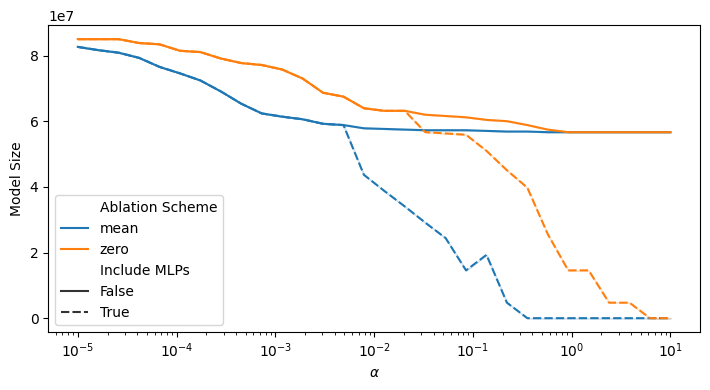

In [125]:
plt.figure(figsize=(ratio*4, 4))
ax = sns.lineplot(df, x="Threshold", y="Size", 
                  hue="Ablation Scheme", style="Include MLPs", errorbar="sd")
ax.set_xscale("log")
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel("Model Size")
plt.tight_layout()
plt.savefig(f"images/{task}_alpha_size.pdf")

In [126]:
df_grouped = df.groupby(["Threshold", "Ablation Scheme", "Include MLPs"]).mean()[["Accuracy", "Size (%)"]]
df_grouped["error"] = df.groupby(["Threshold", "Ablation Scheme", "Include MLPs"]).std()["Accuracy"]
df_grouped

Accuracy   Size (%)  error
Threshold Ablation Scheme Include MLPs                            
0.000010  mean            False            1.000   2.776524    0.0
                          True             1.000   2.776524    0.0
          zero            False            1.000   0.000000    0.0
                          True             1.000   0.000000    0.0
0.000016  mean            False            1.000   3.933409    0.0
...                                          ...        ...    ...
6.210169  zero            True             0.924  99.998194    0.0
10.000000 mean            False            0.760  33.350790    0.0
                          True             0.472  99.998194    0.0
          zero            False            0.000  33.350790    0.0
                          True             0.924  99.998194    0.0

[120 rows x 3 columns]

In [127]:
data_up = df_grouped.copy()
data_down = df_grouped.copy()
data_up["Accuracy"] = data_up["Accuracy"] + data_up["error"]
data_down["Accuracy"] = data_down["Accuracy"] - data_down["error"]
df_grouped = pd.concat([data_up, data_down])

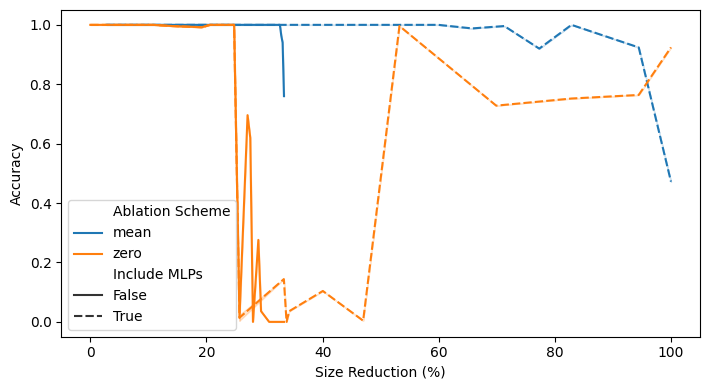

In [128]:
plt.figure(figsize=(ratio*4, 4))
ax = sns.lineplot(df_grouped, x="Size (%)", y="Accuracy", hue="Ablation Scheme", style="Include MLPs")
ax.set_xlabel("Size Reduction (%)")
plt.tight_layout()
plt.savefig(f"images/{task}_size_acc.pdf")